In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#to plot 3d
from mpl_toolkits.mplot3d import Axes3D

### generate random input data to train to

In [3]:
#set the observation
observations = 10000

In [4]:
#two variables linear model
xs = np.random.uniform(low=-10, high=10, size = (observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

In [5]:
#combine into one input
inputs = np.column_stack((xs,zs))

In [6]:
inputs.shape

(10000, 2)

In [7]:
#declair noise using random uniform, matching size with xs and zs 
noise = np.random.uniform(-1,1, (observations,1))

In [8]:
#randomly choosing target model/function

#targets = 2*xs - 3*zs + 5 + noise 
targets = 13*xs + 7*zs - 12 + noise

In [9]:
#check target shape
targets.shape

(10000, 1)

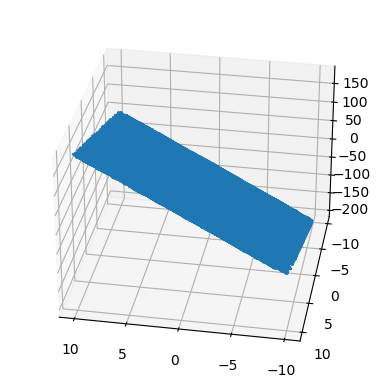

In [10]:
#plot the data to see lf it's in linear relationship
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)
plt.show()

In [11]:
targets.shape

(10000,)

In [12]:
targets = targets.reshape(observations,1)

In [13]:
#weights and biases will randomly initial pick from this interval
init_range = 0.1

In [14]:
#declair randomly generate weights and biases witnin the interval of init_range
weights = np.random.uniform(-init_range, init_range, size= (2,1))
biases = np.random.uniform(-init_range, init_range, size= 1)

print('weights = ' + str(weights))
print('biases = '+ str(biases))

weights = [[ 0.08061358]
 [-0.00032264]]
biases = [-0.04675105]


In [15]:
#set the learning rate for the model
learning_rate = 0.04

### train the model

In [16]:
#generate the ouptput
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2)/2/observations
    #loss = np.sum(np.absolute(deltas)) / 2 / observations

    
    print(loss)
    
    deltas_scaled = deltas/observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases -learning_rate *np.sum(deltas_scaled)

3674.4548258867294
473.10545691993434
107.01862854517789
61.31048619557384
52.26129513735692
47.68980215199067
43.908007488406824
40.47228904887814
37.31165319666988
34.39947152497102
31.715678788396396
29.242301284614
26.9628347306799
24.86207580091994
22.926013917593302
21.14173701280045
19.497345321035244
17.98187200577849
16.58521001776856
15.298044688549355
14.11179160872929
13.018539376526743
12.010996834763972
11.082444444418824
10.226689470433138
9.438024680900883
8.711190284191492
8.041338850157956
7.424002981481163
6.855065519542631
6.330732086121914
5.8475057777926684
5.402163844248379
4.9917361950198185
4.613485591240703
4.264889390355631
3.9436227220214772
3.6475429829982704
3.374675547622531
3.123200598562629
2.8914409900274376
2.677851062485226
2.4810063342954174
2.2995940015042877
2.1324041824455677
1.9783218487539955
1.8363193889780107
1.7054497551964058
1.584840146932234
1.4736861902403906
1.371246573147947
1.2768381016695995
1.189831143425758
1.1096454284755717
1.035

In [17]:
#targets = 13*xs + 7*zs - 12 + noise
print('weights = ' + str(weights))
print('biases = '+ str(biases))

weights = [[12.99913677]
 [ 6.99963719]]
biases = [-11.7878669]


Text(0.5, 0, 'targets')

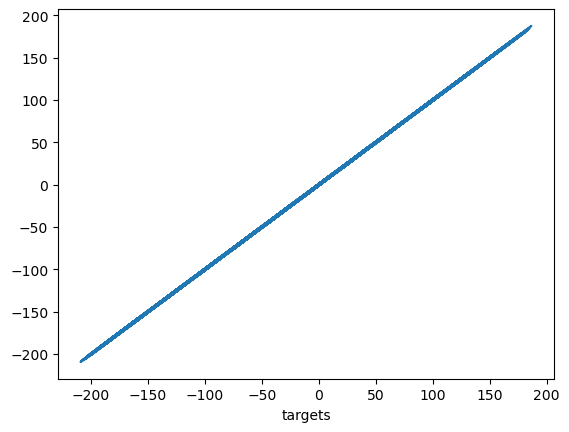

In [18]:
#visulize the model efficiency, the closer the line to 45 degree, the better 
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.xlabel('targets')

In [19]:
###